## მატრიცა

## მატრიცის დეტერმინანტი

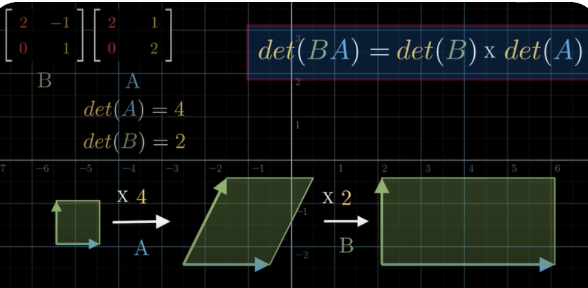


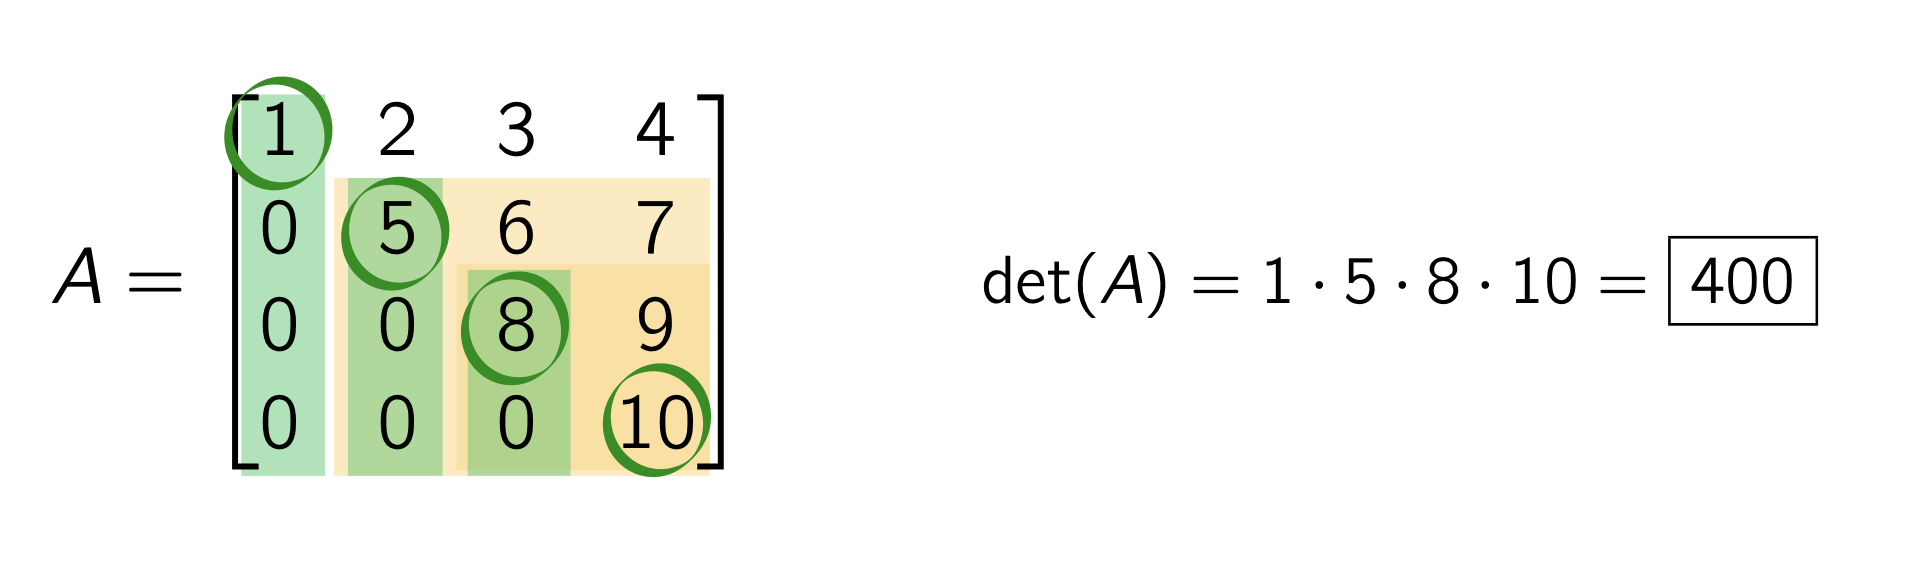

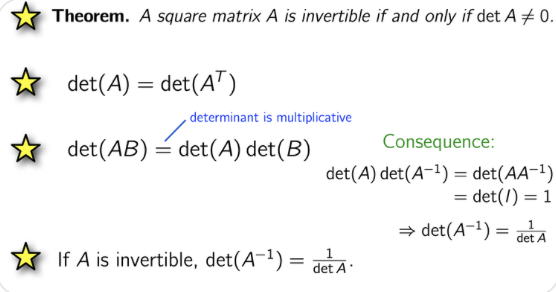

## Eigenvalues/Eigenvectors

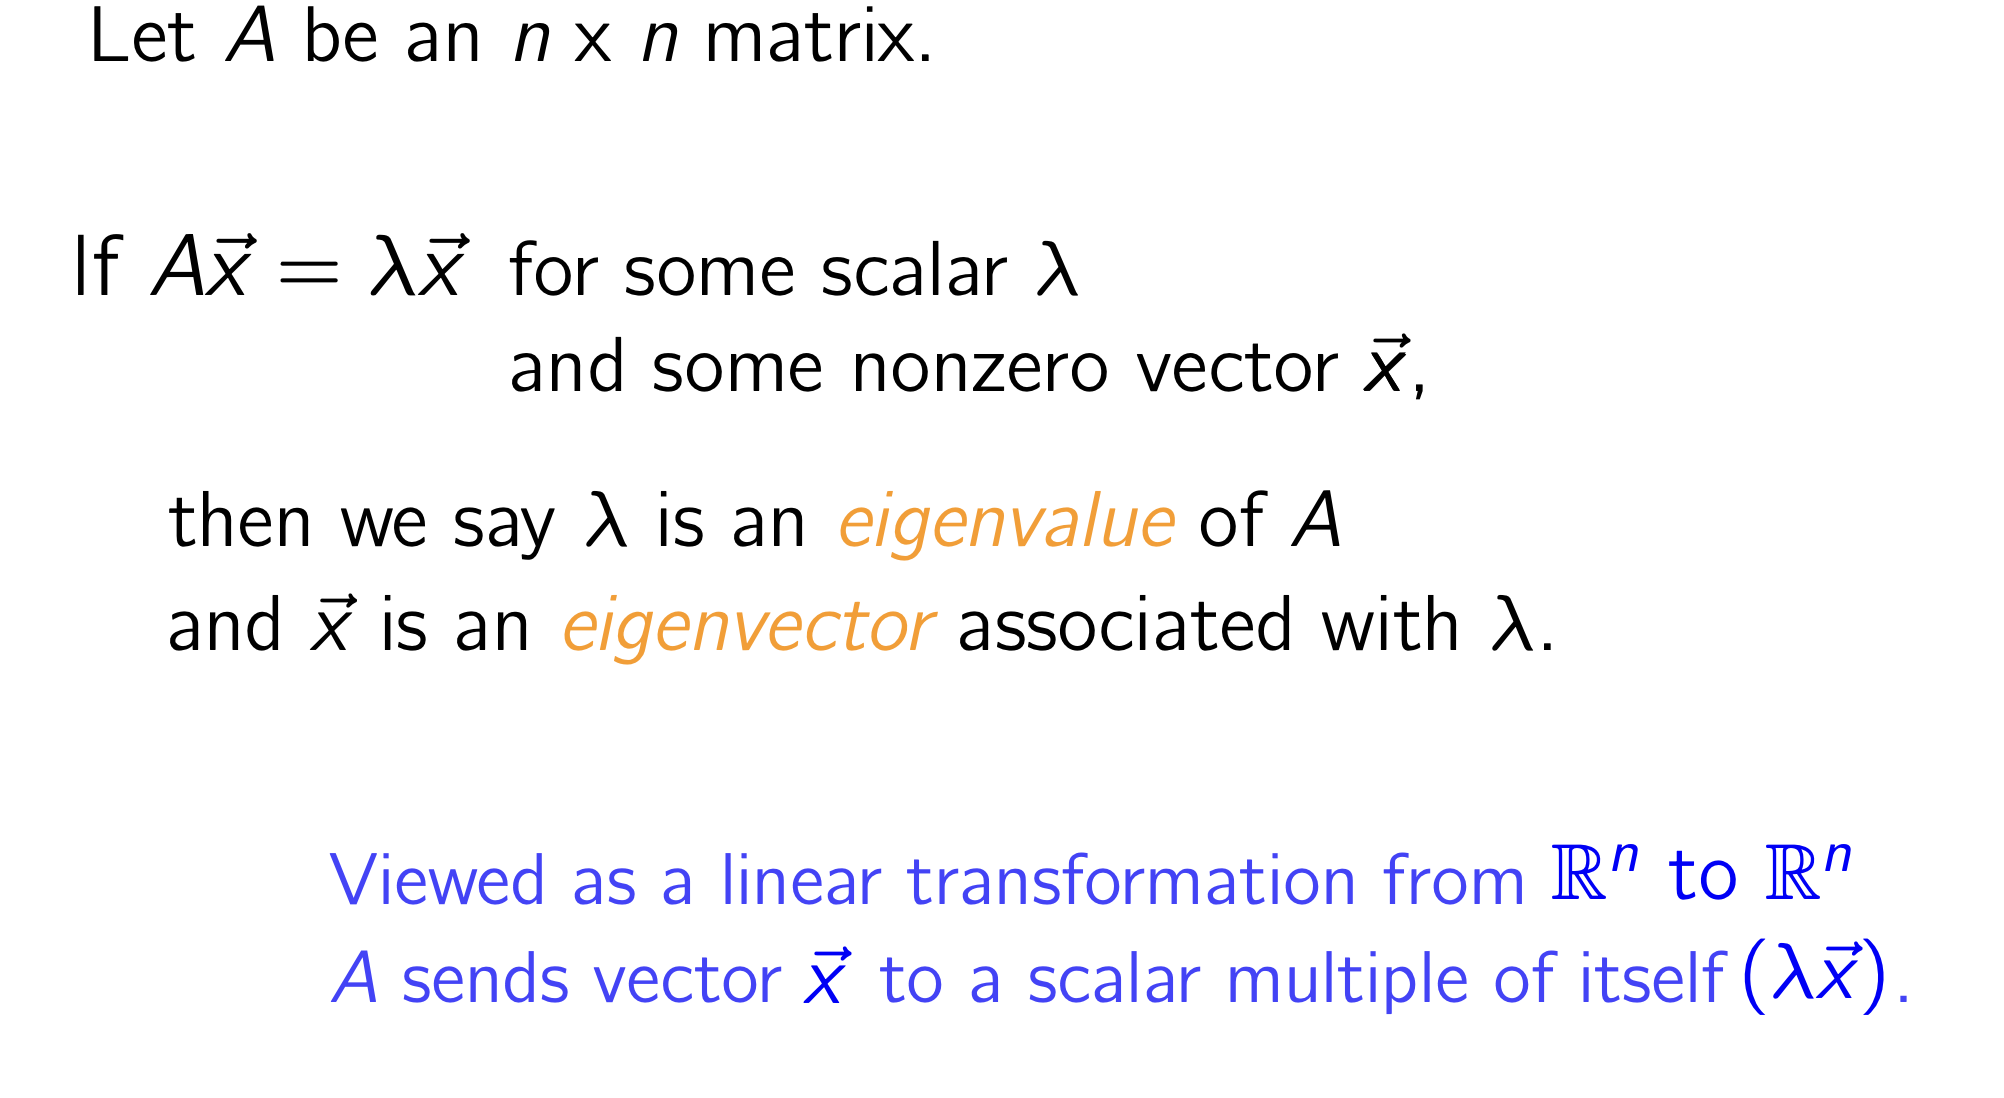

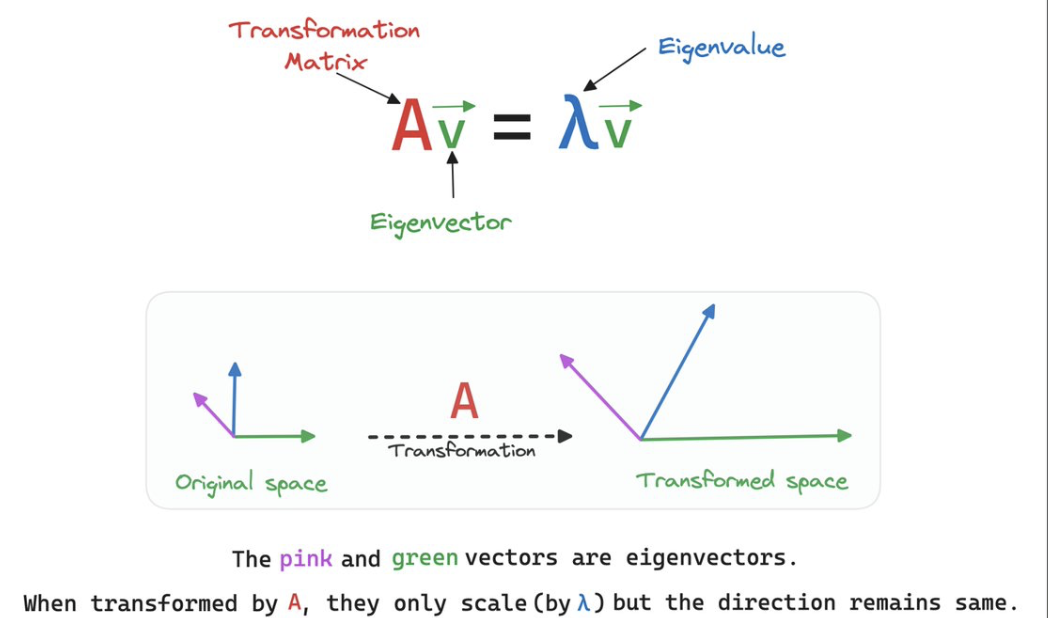

## მატრიცის "ელიმინაცია"




### Back substitution function

We will start with the back substitution step, since that is the easier part.  If the elimination step is successful, we will have an upper triangular system $UX=B$ that has the following form.

$$
\begin{equation}
\left[ \begin{array}{rrrr} * & * & * & * \\ 0 & * & * & * \\ 0 & 0 & * & * \\ 0 & 0 & 0 & * \end{array}\right]
\left[ \begin{array}{r}  x_1 \\  x_2  \\ x_3 \\ x_4  \end{array}\right]=
\left[ \begin{array}{r}  * \\  *  \\ * \\ *  \end{array}\right]
\end{equation}
$$

We will put the code in a function so that that it is easy to reuse later.  For this function, let's suppose that we are given the upper triangular matrix $U$ and the known vector $B$ and we want to find the vector $X$ so that $UX=B$.  Note we could make other assumptions, such as the matrix $U$ having diagonal entries equal to 1.  The fewer such assumptions we make, the more useful the code will be later.

### Row reduction function

Elimination is the larger and more complex part of the solution method.  It is also a common task that will arise in future sections, so we will want some code that we can reuse at a later point.  We want a function that will carry out all the steps of elimination, and just return the end result.  It is not necessary to see all the individual row operations that took place as part of the process.  Ideally we would like the function to carry out the elimination on arrays of any size or shape, and also be able to _make the decision_ to perform row swaps when necessary.

Let's clarify the goal. The function should accept an arbitrary array and return an array that has the following properties.

1. The first nonzero entry in each row is a 1.  These entries are the pivots.
2. Each pivot is located to the right of the pivots in all rows above it.
3. The entries below each pivot are 0.
4. Rows that are all zeros are located below rows that contain nonzero entries.

Such a matrix is said to be in a **row echelon form**.  Here are three examples of matrices in the form that we seek.

   
$$
\begin{equation}
\left[ \begin{array}{cccc} 1 & * & * & * \\ 0 & 1 & * & * \\ 0 & 0 & 1 & * \end{array}\right]
\end{equation}
$$

$$
\begin{equation}
\left[ \begin{array}{ccc} 1 & * & *  \\ 0 & 0 & 1  \\ 0 & 0 & 0 \end{array}\right]
\end{equation}
$$


$$
\begin{equation}
\left[ \begin{array}{cccccc} 1 & * & * & * & * & * \\ 0 & 0 & 1 & * & * & * \\ 0 & 0 & 0 & 1 & * & * \end{array}\right]
\end{equation}
$$

It is important to notice that each row can contain at most one pivot and each column can contain at most one pivot.

Before presenting the code to find the row echelon form of a matrix, we first make a clarification about the matrices we work with when we are solving a system of the form $AX=B$.  We recall from the [Gaussian Elimination](Gaussian_Elimination.ipynb) section that the same row operations needed to bring $A$ to row echelon form must also be applied to $B$.  In practice we can join $A$ and $B$ together to form what we call an **augmented matrix**. We then carry out the row operations on this single matrix.  Here is an example of the augmented matrix, which we will write as $[A|B]$, associated with the system $AX=B$.

$$
\begin{equation}
AX = B \hspace{1cm} \left[ \begin{array}{rrr} 3 & -1 \\ 5 & 2 \end{array}\right]
\left[ \begin{array}{r} x_1 \\ x_2 \end{array}\right]=
\left[ \begin{array}{r} 0\\ 7  \end{array}\right] \hspace{1cm} \to \hspace{1cm}
[A|B] = \left[ \begin{array}{rr|r} 3 & -1 & 0 \\ 5 & 2 & 7 \end{array}\right]
\end{equation}
$$


In our current objective, $A$ is $n\times n$, which means that the augmented matrix we need to process will be $n\times(n+1)$.  We will also assume at this point that the system $AX=B$ has a unique solution.  If this is true the augmented matrix will have a pivot in each of the first $n$ columns, with the pivot positions lying along the diagonal line of entries starting at the top left entry.  If the row echelon form of the augmented matrix has a zero in any of these positions, our solution process breaks down as shown in the [Gaussian Elimination](Gaussian_Elimination.ipynb) examples.


### Solve system function

Now we can combine the $\texttt{RowReduction}$ and the $\texttt{BackSubstitution}$ functions together to carry out the solution algorithm for the system $AX=B$.  Let us assume that the user of the function will supply $A$ and $B$, and the function will return the solution $X$.  Here are the steps that need to be completed.

1. Build the associated augmented matrix.
2. Apply $\texttt{RowReduction}$.
3. Split the matrix.
4. Apply $\texttt{BackSubstitution}$ and return the result.

Note that there are other ways we could build our function.  We could require the user to supply the augmented matrix for example, but then that means the user (which is likely us!) has to do step 1 every time they use this function.  It is better to let the function handle that step.

A matrix is said to be in **reduced row echelon form** if it satisfies the following properties.

   1. The first nonzero entry in each row is a 1.  These entries are the pivots.
   2. Each pivot is located to the right of the pivots in all rows above it.
   3. The entries below **and above** each pivot are 0.
   4. Rows that are all zeros are located below other rows.

Here is an example of a matrix in reduced row echelon form.


$$
\begin{equation}
\left[ \begin{array}{cccc} 1 & 0 & 0 & * \\ 0 & 1 & 0 & * \\ 0 & 0 & 1 & * \end{array}\right]
\end{equation}
$$


Note that for the system represented by the augmented matrix in the first example, the solution is given by the entries in the final column.  There is no need for back substitution if the augmented matrix is in reduced row echelon form.
   



### მატრიცის ფაქტორიზაცია

We saw in the last section that given two matrices, $A$ and $B$, of compatible shapes, we are able to define the product matrix $C=AB$ in a useful way.  In this section we discuss the factorization of a matrix.  One might naturally ask if it is possible to start with matrix $C$ and determine the two matrix factors $A$ and $B$.  As it turns out, a useful course of action is to look for matrix factors that have a particular structure.

One such factorization, that is closely related to the elimination process, is known as the LU Factorization.  Given a matrix $A$, we will look for matrices $L$ and $U$ such that

- $LU = A$
- $L$ is a lower triangular matrix with main diagonal entries equal to 1.
- $U$ is an upper triangular matrix.

Here is a visualization of what we are seeking.


$$
\begin{equation}
A = \left[ \begin{array}{cccc} * & * & * & * \\ * & * & * & * \\ * & * & * & * \\ * & * & * & *  \end{array}\right]\hspace{1cm}
L = \left[ \begin{array}{cccc} 1 & 0 & 0 & 0 \\ * & 1 & 0 & 0 \\ * & * & 1 & 0 \\ * & * & * & 1 \end{array}\right]\hspace{1cm}
U = \left[ \begin{array}{cccc} * & * & * & * \\ 0 & * & * & * \\ 0 & 0 & * & * \\ 0 & 0 & 0 & *  \end{array}\right]\hspace{1cm}
\end{equation}
$$

Before we tackle the problem of calculating $L$ and $U$ from a known matrix $A$, let's see why such a factorization is useful.  Suppose that we have found $L$ and $U$ so that $A=LU$ and we wish to solve the system $AX=B$.  Another way to write the problem is $LUX=B$.  We can then define another unknown $Y$ by saying that $UX=Y$, and exchange the a single system $AX=B$ for following two systems.

$$
\begin{eqnarray*}
UX & = & Y\\
LY & = & B
\end{eqnarray*}
$$

While it is true that we have in fact doubled the number of equations, the two systems that we have are triangular and can be solved easily with back (or forward) substitution.  The first example shows the details for specific system.

## Soving a system using LU factorization

We want to solve the system of equations.

$$
\left[ \begin{array}{ccc} 3 & -1 & -2 \\ 6 & -1 & 0  \\ -3 & 5 & 20  \end{array}\right]X =
\left[ \begin{array}{c} -4 \\ -8 \\ 6  \end{array}\right]\hspace{1cm}
$$

where $X$ is an unknown $3\times 1$ vector.  Suppose we also have computed $L$ and $U$.

$$
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ 2 & 1 & 0  \\ -1 & 4 & 1  \end{array}\right] \hspace{2cm}
U = \left[ \begin{array}{ccc} 3 & -1 & -2 \\ 0 & 1 & 4  \\ 0 & 0 & 2  \end{array}\right]
$$


Now let's write out the systems $UX=Y$ and $LY = B$.  For the sake of clarity, we leave the matrix notation aside for a moment and use the variables $x_1$, $x_2$, and $x_3$ for the entries of $X$ and the variables $y_1$, $y_2$, and $y_3$ for the entries of $Y$.


$$
\begin{eqnarray*}
x_1 \hspace{2.1cm}& = & y_1\\
2x_1 + x_2 \hspace{1.1cm}& = & y_2\\
-x_1 + 4x_2 +x_3 & = & y_3 \\
\\
3y_1 - y_2 - 2y_3 & = & -4\\
y_2 + 4y_3 & = & -8\\
2y_3 & = & 6
\end{eqnarray*}
$$

Now the solution is a matter of substitution.  The last equation tells us $y_3$.  From there we work backwards to find $y_2$ and $y_1$.  Then we go the first three equations to determine the $x$ values in a similar way, starting this time with the very first equation and working our way down.

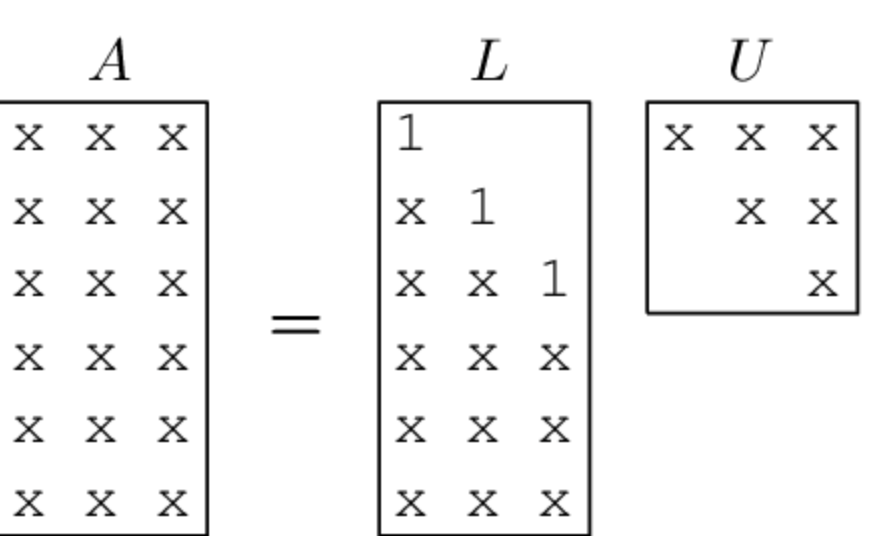

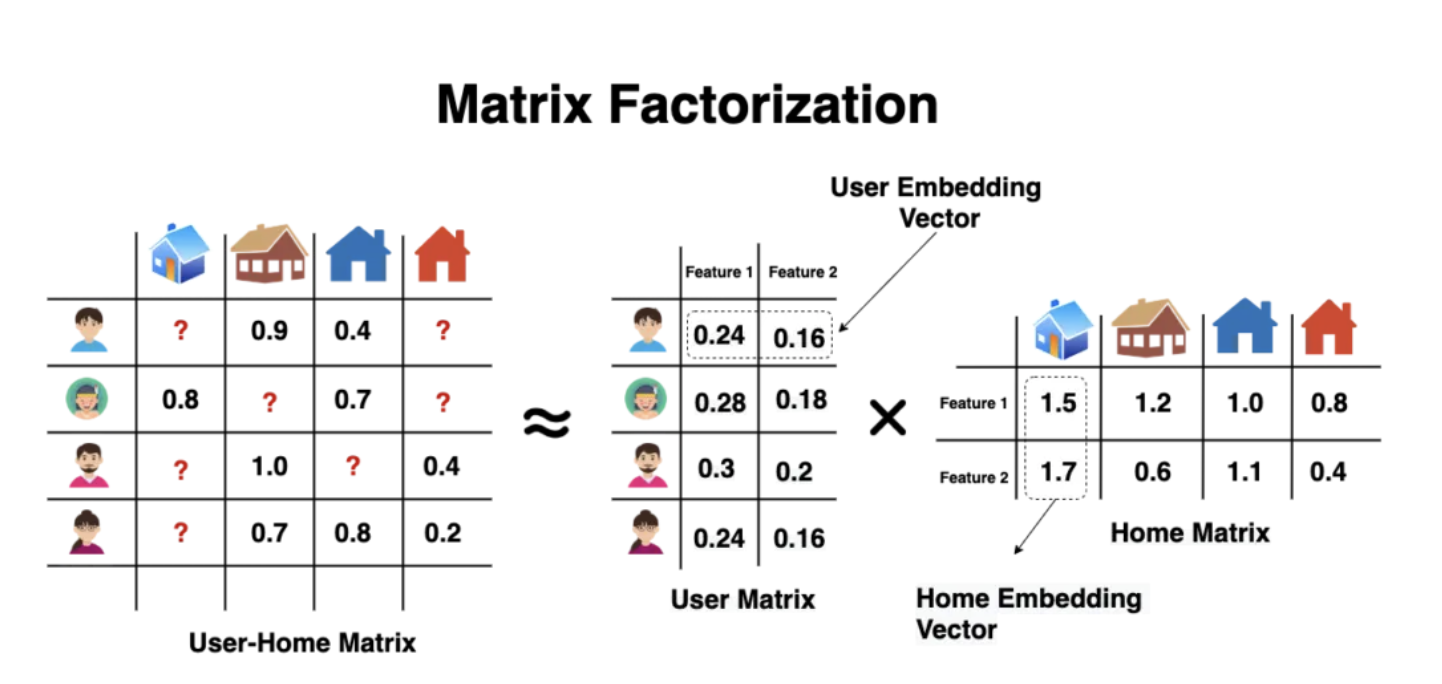

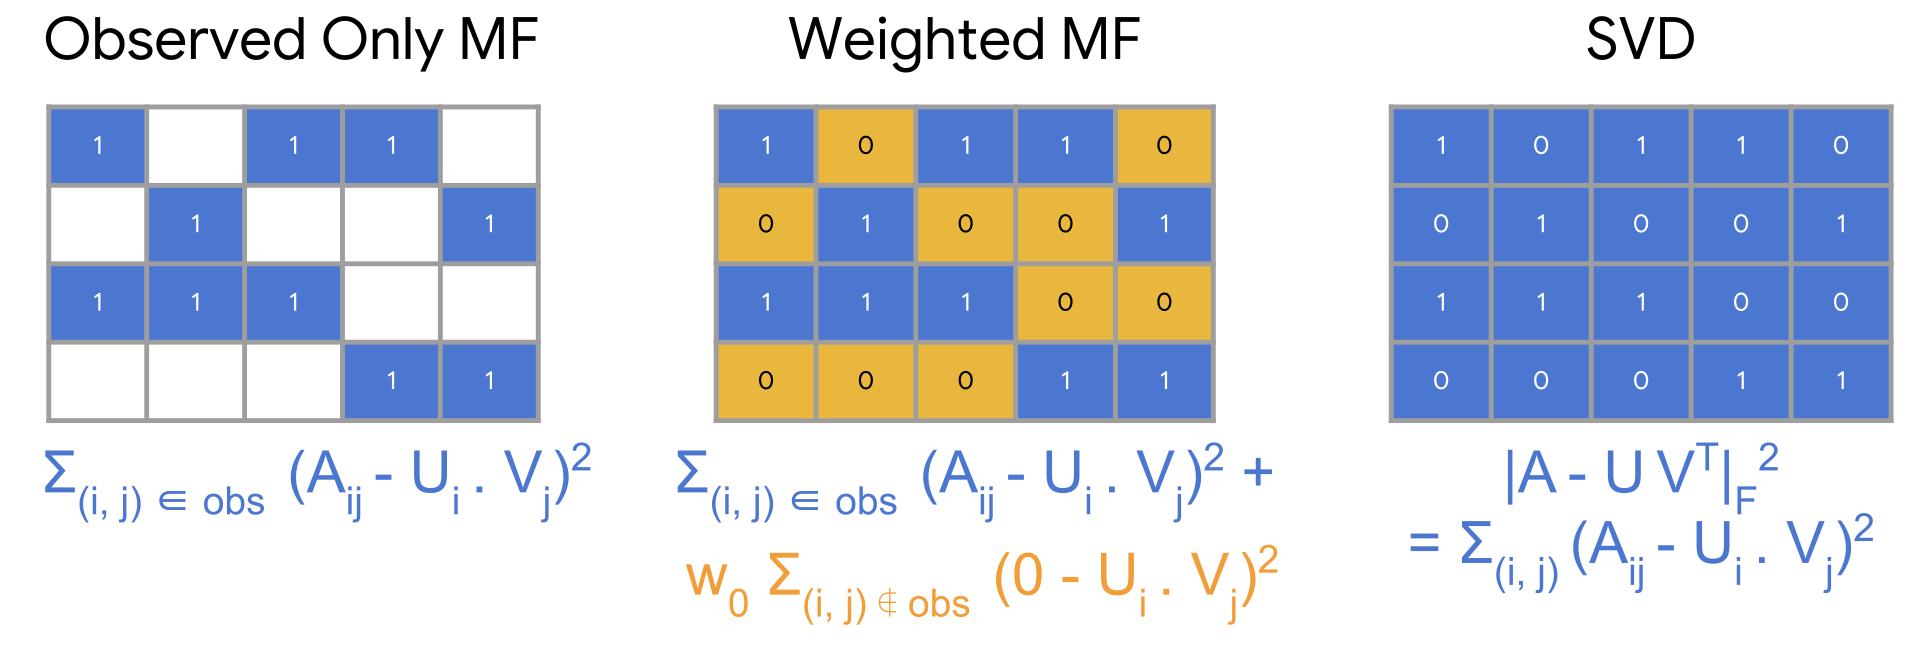